In [1]:
#Importing the Nominatim geocoder class 
from geopy.geocoders import Nominatim
import time
from pprint import pprint
import rasterio as rio
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# address we need to geocode
loc = '21 Groenplaats, 2000 Antwerpen'

In [3]:
import requests
import json

url = f'http://nominatim.openstreetmap.org/search?q={loc}&polygon_geojson=1&format=json&limit=1'

r = requests.get(url)

response = r.json()

polygon = response[0]['geojson']
polygon


{'type': 'Polygon',
 'coordinates': [[[4.4004211, 51.2201948],
   [4.4004381, 51.220193],
   [4.4004667, 51.2201902],
   [4.4004581, 51.2201564],
   [4.4004479, 51.2201573],
   [4.4004452, 51.220147],
   [4.4004695, 51.2201441],
   [4.400479, 51.2201254],
   [4.4004619, 51.2201171],
   [4.4004727, 51.2201085],
   [4.4004892, 51.2201165],
   [4.4005219, 51.2201049],
   [4.4005195, 51.220092],
   [4.4005359, 51.2200906],
   [4.4005389, 51.220103],
   [4.4006412, 51.2200925],
   [4.400579, 51.2200773],
   [4.4006284, 51.2200483],
   [4.4006494, 51.2200677],
   [4.4007966, 51.2200479],
   [4.4009933, 51.2200214],
   [4.4009939, 51.2200159],
   [4.4010002, 51.2200153],
   [4.4013296, 51.2199833],
   [4.4013255, 51.2199658],
   [4.4013331, 51.219966],
   [4.4013396, 51.219959],
   [4.4013557, 51.2199576],
   [4.4013578, 51.2199614],
   [4.4013684, 51.2199606],
   [4.4013692, 51.2199631],
   [4.4013721, 51.2199648],
   [4.4013754, 51.2199715],
   [4.4013982, 51.2199895],
   [4.4014706, 51.219

In [4]:
# Transform projection of imagery to specific coordinate system

# Specify output projection system
dst_crs = 'EPSG:4326'

# Input imagery file name before transformation
input_imagery_file = r'D:\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k15\GeoTIFF\DHMVIIDSMRAS1m_k15.tif'
# Save output imagery file name after transformation
transformed_imagery_file = r'D:\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k15\GeoTIFF\TRF_DHMVIIDSMRAS1m_k15.tif'

with rio.open(input_imagery_file) as imagery:
    transform, width, height = calculate_default_transform(imagery.crs, dst_crs, imagery.width, imagery.height, *imagery.bounds)
    kwargs = imagery.meta.copy()
    kwargs.update({'crs': dst_crs, 'transform': transform, 'width': width, 'height': height})
    with rio.open(transformed_imagery_file, 'w', **kwargs) as dst:
        for i in range(1, imagery.count + 1):
            reproject(
                source=rio.band(imagery, i),
                destination=rio.band(dst, i),
                src_transform=imagery.transform,
                src_crs=imagery.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

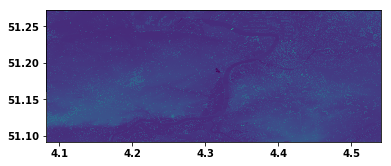

Transformed Imagery file Projection:  EPSG:4326


In [5]:
# Plot again after transformation. You can observe axis value have changed
tr_imagery = rio.open(r'D:\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k15\GeoTIFF\TRF_DHMVIIDSMRAS1m_k15.tif')
# Plot trasformed imagery
show(tr_imagery)

# Check coordinate reference system of transformed imagery, it's changed or not?
print('Transformed Imagery file Projection: ', tr_imagery.crs)
# tr_imagery.crs

In [37]:
print(tr_imagery.bounds)


BoundingBox(left=4.082181039683598, bottom=51.09176445790075, right=4.540703825508944, top=51.27187886015492)


In [6]:
# Transform projection of imagery to specific coordinate system

# Specify output projection system
dst_crs = 'EPSG:4326'

# Input imagery file name before transformation
input_imagery_file = r'D:\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k15\GeoTIFF\DHMVIIDTMRAS1m_k15.tif'
# Save output imagery file name after transformation
transformed_imagery_file = r'D:\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k15\GeoTIFF\TRF_DHMVIIDTMRAS1m_k15.tif'

with rio.open(input_imagery_file) as imagery:
    transform, width, height = calculate_default_transform(imagery.crs, dst_crs, imagery.width, imagery.height, *imagery.bounds)
    kwargs = imagery.meta.copy()
    kwargs.update({'crs': dst_crs, 'transform': transform, 'width': width, 'height': height})
    with rio.open(transformed_imagery_file, 'w', **kwargs) as dst:
        for i in range(1, imagery.count + 1):
            reproject(
                source=rio.band(imagery, i),
                destination=rio.band(dst, i),
                src_transform=imagery.transform,
                src_crs=imagery.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)

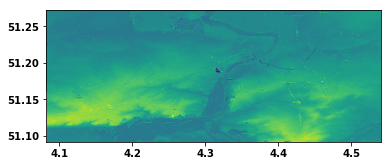

Transformed Imagery file Projection:  EPSG:4326


In [7]:
# Plot again after transformation. You can observe axis value have changed
tr_imagery = rio.open(r'D:\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k15\GeoTIFF\TRF_DHMVIIDTMRAS1m_k15.tif')
# Plot trasformed imagery
show(tr_imagery)

# Check coordinate reference system of transformed imagery, it's changed or not?
print('Transformed Imagery file Projection: ', tr_imagery.crs)
# tr_imagery.crs

In [8]:
# Masking the raster using the polygon

In [27]:
DSM_fp = r'D:\becode_projects\3D-Houses\DHMVIIDSMRAS1m_k15\GeoTIFF\TRF_DHMVIIDSMRAS1m_k15.tif'
DTM_fp = r'D:\becode_projects\3D-Houses\DHMVIIDTMRAS1m_k15\GeoTIFF\TRF_DHMVIIDTMRAS1m_k15.tif'


In [32]:
with rio.open(DSM_fp) as src:
    out_DSM_img, out_transform = mask(src, [polygon], crop=True, nodata=0, filled=True, indexes=1)
    out_meta_DSM = src.meta

In [33]:
with rio.open(DTM_fp) as src:
    out_DTM_img, out_transform = mask(src, [polygon], crop=True, nodata=0, filled=True, indexes=1)
    out_meta_DTM = src.meta

In [34]:
out_img_chm = out_DSM_img - out_DTM_img
out_img_chm.shape

(54, 140)

In [31]:
out_img_chm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
out_meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 35182,
 'height': 13820,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(1.3032880047335156e-05, 0.0, 4.082181039683598,
        0.0, -1.3032880047335156e-05, 51.27187886015492)}

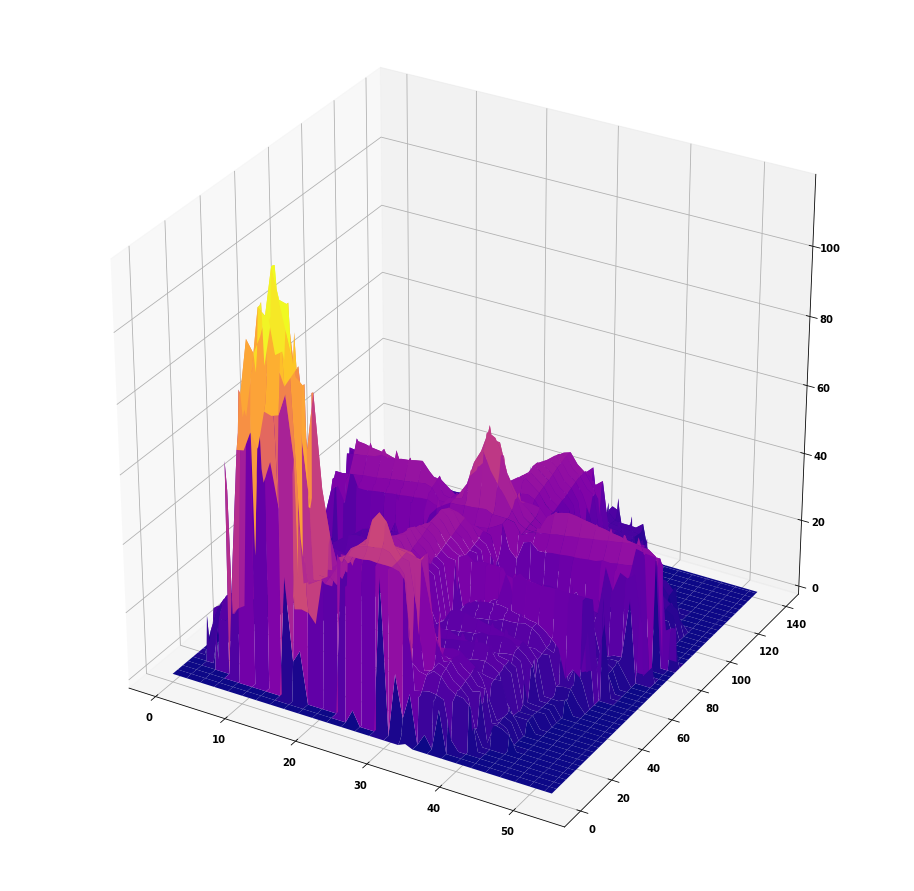

In [16]:
# 3-D Plot using CHM array

# Assigning the x, y and z values
x = range(0, 54)
y = range(0, 140)

x, y = np.meshgrid(x, y, indexing = 'ij')

z = out_img_chm   #elevation  

# creating a figure for plotting
fig = plt.figure(figsize=(16,16))

# Creating plot
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap = 'plasma')

# Showing the above plot
plt.show()

In [36]:
# using plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Surface(z=out_img_chm, colorscale = 'sunsetdark'))
fig.update_layout(autosize=False,
                  width=1200, height=1000)
fig.show()

In [ ]:
# Different Method
DSM_ = rio.open(DSM_fp)
DSM_f = DSM_.read(1)
DSM_f


In [ ]:
ind_row, ind_col = rio.transform.TransformMethodsMixin.index(DSM_, 4.403969, 51.2126528) 

In [ ]:
 DSM_slice = DSM_f[ind_row-30:ind_row+30,ind_col-30:ind_col+30]

In [ ]:
print(ind_row, ind_col)

In [ ]:
# 3D plotting using DSM
nx = DSM_slice.shape[1]
ny = DSM_slice.shape[0]

x = range(nx)
y = range(ny)


X,Y = np.meshgrid(x,y)
hf = plt.figure(figsize=(16,16))
ha = hf.add_subplot(111,projection = '3d')

ha.plot_surface(X,Y,DSM_slice)
X.shape
Y.shape